### Least Squares Parameter Estimation

**Different ways to estimate parameters **
1. Sickit Learn Package
2. Gradient Descent Algorithm
3. Generic Close Form Solution with Numpy

In [1]:
import pandas as pd

In [2]:
train=pd.read_csv("DATA/kc_house_train_data.csv",dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
test=pd.read_csv("DATA/kc_house_test_data.csv",dtype = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})


In [3]:
import numpy as np
from matplotlib import pyplot as plt

/Users/rohankotwani/anaconda/envs/datasci/lib/python3.5/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


SSE:  1.16346413325e+15
intercept:  91838.157485
coefficients:  [   319.35361421 -64325.65884225]


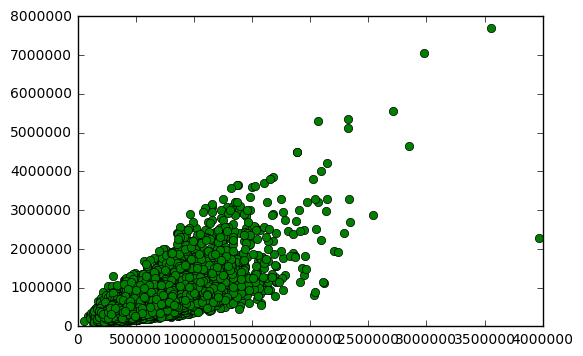

In [4]:
from sklearn import linear_model
X = train[['sqft_living','bedrooms']]
y = train['price']
# Fit line using all data

model = linear_model.LinearRegression()
model.fit(X, y)

print("SSE: ",model.residues_)
print("intercept: ",model.intercept_)
print("coefficients: ",model.coef_)


# Predict data of estimated models

line_y = model.predict(X)


plt.plot(line_y, y, 'go',
            label='Outliers')
plt.show()

In [5]:

def cost_function(X, y, theta):
    """
    cost_function(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    ## number of training examples
    m = len(y) 
    
    ## Calculate the cost with the given parameters
    J = np.sum((X.dot(theta)-y)**2)/2/m
    
    return J

In [76]:

def gradient_descent(x, y, iters, alpha,w):
#     w= np.zeros(x.shape[1]).reshape((x.shape[1],1))
#     w=np.array([-94,263]).reshape((x.shape[1],1))
    cost_history = [0] * iters
    for i in range(iters):
        
    
        change=0
        converged=False
        done=True
        hypothesis = x.dot(w)
        loss = hypothesis-y
        gradient = x.T.dot(loss)/m
        w = w - alpha*gradient
        cost = cost_function(x, y, w)
        cost_history[i] = cost
        
        
        if not done and change<=10:
            change+=change
        else:
            change=0
            done=True
        
        if cost>=cost_history[i-1] and done:
            alpha=alpha*0.1
            done=False
        elif cost<cost_history[i-1]:
            alpha=alpha*1.1
            

    return w,alpha,cost


input_df2 = train[['sqft_living','bedrooms']]
output = train[["price"]]


y=output.values
input_=input_df2.values
m,n =np.shape(input_)
x=np.ones((m,n+1))
x[:,1:]=input_

alpha = 0.01 # set step-size
iters = 100 # set number of iterations
w=np.zeros(x.shape[1]).reshape((x.shape[1],1))
criteria = []
cost_history = [0] * 500
for i in range(500):
    
    w,cost_h,cost = gradient_descent(x, y, iters, alpha,w)
    cost_history[i] = cost
    if i>0 and cost<cost_history[i-1] and abs(cost_history[i-1]-cost)/cost*100>0.0000001:
        z=w

        
    elif i>0 and abs(cost_history[i-1]-cost)/cost*100<=0.0000001:
        break
        
    
    alpha=alpha*(1+1/(i+1))
    print("cost change: ",((cost_history[i-1]-cost)/cost*100))
    print("parameters: ",w)
    print("alpha ", alpha )
    print("iteration: ",i)

cost change:  -100.0
parameters:  [[ -85.85895902]
 [ 263.88169303]
 [-568.4021567 ]]
alpha  0.02
iteration:  0
cost change:  0.163219680124
parameters:  [[ -252.29789025]
 [  265.56674575]
 [-1685.43945678]]
alpha  0.03
iteration:  1
cost change:  0.228356904009
parameters:  [[ -487.090448  ]
 [  268.01690418]
 [-3307.39501198]]
alpha  0.039999999999999994
iteration:  2
cost change:  0.275406457936
parameters:  [[ -772.09736082]
 [  271.11726193]
 [-5369.43768908]]
alpha  0.04999999999999999
iteration:  3
cost change:  0.301796053632
parameters:  [[-1084.40602649]
 [  274.75062247]
 [-7789.57755388]]
alpha  0.059999999999999984
iteration:  4
cost change:  0.334384100729
parameters:  [[ -1423.17622436]
 [   279.13500957]
 [-10720.5294812 ]]
alpha  0.06999999999999998
iteration:  5
cost change:  0.289892971137
parameters:  [[ -1703.42457315]
 [   283.34167655]
 [-13545.09405788]]
alpha  0.07999999999999997
iteration:  6
cost change:  0.264021165436
parameters:  [[ -1930.42677385]
 [   2

[[ 91751.38356994]
 [   319.11985718]
 [-64140.5862471 ]]


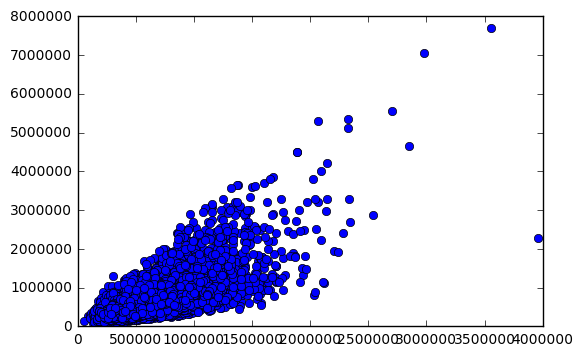

In [64]:
print(w)
plt.plot(x.dot(w),y,'o')
plt.show()

In [50]:
SSE=np.sum((y-x.dot(w))**2)
print(SSE)

1.20191836524e+15


In [51]:
input_df2 = train[['sqft_living','bedrooms']]
output = train[["price"]]

In [52]:
y=output.values
input_=input_df2.values
scale=np.mean(y)/np.mean(input_)
m,n =np.shape(input_)
x=np.ones((m,n+1))
x[:,1:]=input_
np.mean(y)

539366.62793373212

In [53]:
A=x.T.dot(x)

In [54]:
b=x.T.dot(y)

In [55]:
z = np.linalg.solve(A,b)
print(z)

[[ 91838.15748501]
 [   319.35361421]
 [-64325.65884225]]


In [1019]:
SSE=np.sum((y-x.dot(z))**2)
print(SSE)

1.16346413325e+15


In [1020]:
w

array([[ 90168.76273489],
       [   319.1663264 ],
       [-63734.2665804 ]])

In [1021]:
z = np.linalg.solve(A,b)
print(z)

[[ 91838.15748501]
 [   319.35361421]
 [-64325.65884225]]


In [1022]:
SSE=np.sum((y-x.dot(z))**2)
print(SSE)

1.16346413325e+15


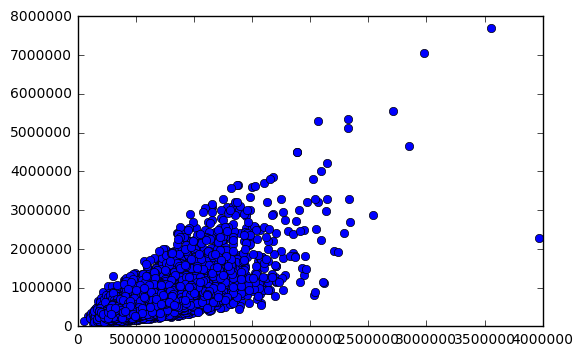

In [1023]:
plt.plot(x.dot(z),y,'o')
plt.show()